In [12]:
import sys
sys.path.append("../../../") # Where to find utilssphering
import utilssphering
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# Read CSV
match_rep_df = pd.read_csv("../../../checkpoints/match_rep_df.csv")
match_rep_df

,Vendor,Batch,Plate_Map_Name,Assay_Plate_Barcode,Modality,Images_per_well,Sites-SubSampled,Binning,Magnification,Number_of_channels,...,Size_MB_std,sphering,value_95_replicating,Percent_Replicating,channel_names,brightfield_z_plane_used,feature_channels_found,Percent_Matching,value_95_matching,cell_count
0,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate2_PCO_6ch_4site_10XPA,Confocal,4,NaN,1,10,6,...,0.000144,True,0.191908,60.000000,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",23.255814,0.288099,2014937
1,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate2_PCO_6ch_4site_10XPA,Confocal,4,NaN,1,10,6,...,0.000144,False,0.269727,53.333333,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",18.604651,0.320855,2014937
2,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crest,Confocal,4,NaN,1,10,6,...,0.000183,True,0.269617,62.222222,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",18.604651,0.398249,2413350
3,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crest,Confocal,4,NaN,1,10,6,...,0.000183,False,0.329074,45.555556,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",18.604651,0.389170,2413350
4,MolDev,Scope1_MolDev_10X_4siteZ,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crestz,Confocal,4,NaN,1,10,6,...,0.000142,True,0.205121,66.666667,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",23.255814,0.363114,2381443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_20X_6Ch_BRO0...,JUMP-MOA_compound_platemap,BRO0117059_20X,Confocal,9,4.0,1,20,6,...,0.000583,False,0.628379,20.000000,"AGP, BrightField, DNA, ER, Mito, RNA",Z08,"AGP, BrightField, DNA, ER, Mito, RNA",6.976744,0.772160,489099
358,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_20X_6Ch_BRO0...,JUMP-MOA_compound_platemap,BRO01177034_20x,Confocal,9,4.0,1,20,6,...,0.000014,True,0.139090,56.666667,"AGP, BrightField, DNA, ER, Mito, RNA",Z17,"AGP, BrightField, DNA, ER, Mito, RNA",18.604651,0.193171,452567
359,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_20X_6Ch_BRO0...,JUMP-MOA_compound_platemap,BRO01177034_20x,Confocal,9,4.0,1,20,6,...,0.000014,False,0.666818,21.111111,"AGP, BrightField, DNA, ER, Mito, RNA",Z17,"AGP, BrightField, DNA, ER, Mito, RNA",9.302326,0.790813,452567
360,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_40X_BRO0117059,JUMP-MOA_compound_platemap,BRO0117059_40x,Confocal,9,4.0,1,40,6,...,0.080201,True,0.193787,53.333333,"AGP, BrightField, DNA, ER, Mito, RNA",Z08,"AGP, BrightField, DNA, ER, Mito, RNA",20.930233,0.234702,116595


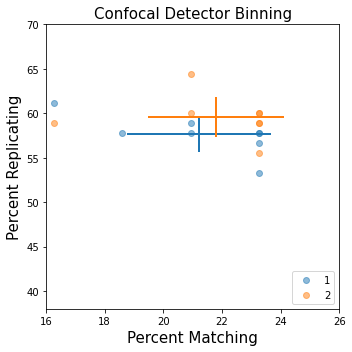

In [25]:
# A

group = "Binning"

df_subset = match_rep_df[
    (match_rep_df["sphering"] == True) & 
    (match_rep_df["Vendor"] == "PE") & 
    (match_rep_df["Modality"] == "Confocal") &
    (~match_rep_df["Batch"].str.contains("siteSub")) 
    ]

group_df = utilssphering.find_group_avg_df(df_subset, group)

fig, ax = plt.subplots(figsize=(5,5))
utilssphering.group_plot(
    df=group_df, 
    x="Mean_Percent_Matching", 
    y="Mean_Percent_Replicating",
    group=group,
    error_x="SD_Percent_Matching",
    error_y="SD_Percent_Replicating",
    fig=fig, 
    ax_=ax
)
utilssphering.group_plot(
    df=df_subset,
    x="Percent_Matching", 
    y="Percent_Replicating",
    group=group,
    fig=fig,
    ax_=ax,
    legend=True,
    legend_location="lower right",
    plot_title="Confocal Detector Binning",
    alpha=0.5,
    x_lim=[16,26],
    y_lim=[38,70],
    xlabel="Percent Matching",
    ylabel="Percent Replicating"
)

fig.savefig("(A)-rep-vs-match-binning-PE-confocal.png", dpi=300)

In [22]:
import scipy

group = "Binning"

df_subset = match_rep_df[
    (match_rep_df["sphering"] == True) & 
    (match_rep_df["Vendor"] == "PE") & 
    # (match_rep_df["Modality"] == "Confocal") &
    (match_rep_df["Modality"] == "Widefield") &
    (~match_rep_df["Batch"].str.contains("siteSub")) 
    ]

group_df = utilssphering.find_group_avg_df(df_subset, group)

scipy.stats.ttest_ind(group_df.loc[0, "Percent_Replicating"], group_df.loc[1, "Percent_Replicating"])

Ttest_indResult(statistic=0.4821538392704674, pvalue=0.637147512170174)

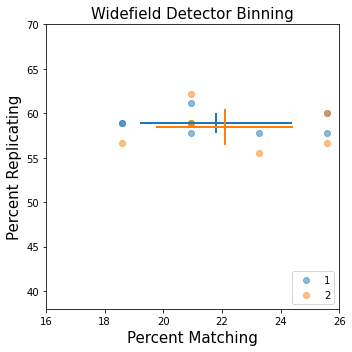

In [26]:
# B

group = "Binning"

df_subset = match_rep_df[
    (match_rep_df["sphering"] == True) &
    (match_rep_df["Vendor"] == "PE") & 
    (match_rep_df["Modality"] == "Widefield") &
    (~match_rep_df["Batch"].str.contains("siteSub")) 
    ]

group_df = utilssphering.find_group_avg_df(df_subset, group)

fig, ax = plt.subplots(figsize=(5,5))
utilssphering.group_plot(
    df=group_df, 
    x="Mean_Percent_Matching", 
    y="Mean_Percent_Replicating",
    group=group,
    error_x="SD_Percent_Matching",
    error_y="SD_Percent_Replicating",
    fig=fig, 
    ax_=ax
)
utilssphering.group_plot(
    df=df_subset,
    x="Percent_Matching", 
    y="Percent_Replicating",
    group=group,
    fig=fig,
    ax_=ax,
    legend=True,
    legend_location="lower right",
    alpha=0.5,
    x_lim=[16,26],
    y_lim=[38,70],
    plot_title="Widefield Detector Binning",
    xlabel="Percent Matching",
    ylabel="Percent Replicating"
)

fig.savefig("(B)-rep-vs-match-binning-PE-widefield.png", dpi=300)

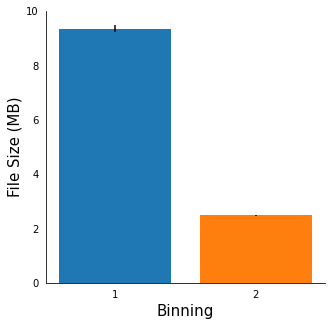

In [16]:
# C

df_subset = match_rep_df[
    (~match_rep_df["Batch"].str.contains("siteSubSample")) & 
    (match_rep_df["sphering"] == True) & 
    (match_rep_df["Vendor"] == "PE")
    ]

additional_cols = {
    "col1": ["Size_MB", "Mean_Size_MB", lambda x: np.mean(x)],
    "col2": ["Size_MB", "std_Size_MB", lambda z: float('%.3f'%np.std(z))]
}
group_df = utilssphering.find_group_avg_df(df_subset, "Binning", add_cols=additional_cols)
group_df

cmap = plt.cm.tab10
colour_palette = list()
for i in range(cmap.N):
    colour_palette.append(cmap(i))

fig, ax = plt.subplots(figsize=(5,5))
ax.bar(group_df["Binning"], group_df["Mean_Size_MB"], yerr=group_df["std_Size_MB"], color=[colour_palette[0], colour_palette[1]])
ax.set_xticks(group_df["Binning"], group_df["Binning"])
ax.set_xlabel("Binning", fontsize=15)
ax.set_ylabel("File Size (MB)", fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(axis="both", which="both", bottom=False, left=False)
ax.yaxis.set_ticks(np.arange(0, 11, 2))
fig.set_facecolor("white")

fig.savefig("(C)-file_size-vs-binning-PE_only.png", dpi=300)

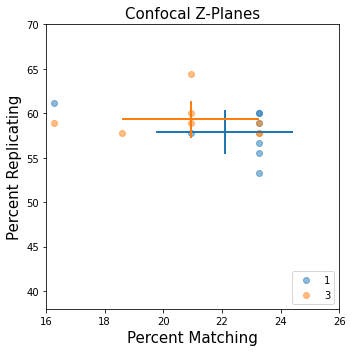

In [23]:
# D

group = ["z_plane"]

df_subset = match_rep_df[
    (match_rep_df["sphering"] == True) & 
    (match_rep_df["Vendor"] == "PE") & 
    (match_rep_df["Modality"] == "Confocal") &
    (~match_rep_df["Batch"].str.contains("siteSub")) 
    ]

group_df = utilssphering.find_group_avg_df(df_subset, group)

fig, ax = plt.subplots(figsize=(5,5))

utilssphering.group_plot(
    df=group_df, 
    x="Mean_Percent_Matching", 
    y="Mean_Percent_Replicating",
    group=group,
    error_x="SD_Percent_Matching",
    error_y="SD_Percent_Replicating",
    fig=fig, 
    ax_=ax
)
utilssphering.group_plot(
    df=df_subset,
    x="Percent_Matching", 
    y="Percent_Replicating",
    group=group,
    fig=fig,
    ax_=ax,
    legend=True,
    legend_location="lower right",
    alpha=0.5,
    x_lim=[16,26],
    y_lim=[38,70],
    plot_title="Confocal Z-Planes",
    xlabel="Percent Matching",
    ylabel="Percent Replicating"
)

fig.savefig("(D)-rep-vs-match-z_plane-confocal.png", dpi=300)

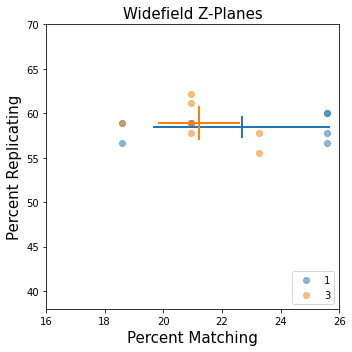

In [24]:
# E

group = ["z_plane"]

df_subset = match_rep_df[
    (match_rep_df["sphering"] == True) & 
    (match_rep_df["Vendor"] == "PE") & 
    (match_rep_df["Modality"] == "Widefield") &
    (~match_rep_df["Batch"].str.contains("siteSub")) 
    ]

group_df = utilssphering.find_group_avg_df(df_subset, group)

fig, ax = plt.subplots(figsize=(5,5))

utilssphering.group_plot(
    df=group_df, 
    x="Mean_Percent_Matching", 
    y="Mean_Percent_Replicating",
    group=group,
    error_x="SD_Percent_Matching",
    error_y="SD_Percent_Replicating",
    fig=fig, 
    ax_=ax
)
utilssphering.group_plot(
    df=df_subset,
    x="Percent_Matching", 
    y="Percent_Replicating",
    group=group,
    fig=fig,
    ax_=ax,
    legend=True,
    legend_location="lower right",
    alpha=0.5,
    x_lim=[16,26],
    y_lim=[38,70],
    plot_title="Widefield Z-Planes",
    xlabel="Percent Matching",
    ylabel="Percent Replicating"
)

fig.savefig("(E)-rep-vs-match-z_plane-widefield.png", dpi=300)